# Week 1 and Week 2:
## Project Environment Setup, Download Data, and Data Visualization:
## Installations:
- Set up Python and essential libraries, including numpy, scipy, sklearn, and librosa.
- Install libraries for machine learning. 
## Download Data:
- ESC-10 sound data (https://github.com/karolpiczak/paper-2015-esc-dataset?tab=readme-ov-file)
## Data Visualization:
- Use matplotlib for data visualization. 

## Use Anaconda for virtual python environment: 
- https://www.anaconda.com/download
- use command `conda create --name cpd_project python=3.12` to create a new python environemnt for My CPD project. 
### My Main reason to use Anaconda: 
- Provide comprehensive package management. 
- provide environemnt management: Easy to create and manage isolated environemnts. 


## Installations: 
- Ensure Python is installed. running `python --version` in command line to check.
- Install essential libraries: 
    + `pip install numpy`
    + `pip install scikit-learn`
    + `pip install scipy`
    + `pip install matplotlib`
    + `pip install librosa`

### In this CPD project, I use waveform, spectrogram, and Fourier Transform to analyze and visualize audio signals. 

- Waveform: Waveforms provide a straightforward way to visualize the temporal structure of the sound signal. It shows how the amplitude of the sound wave varies over time. 
- Spectrogram: It shows the frequencies in a sound signal as it varies with time. The spectrogram shows time on the horizontal axis, frequency on the vertical axis, and amplitude represented by color intensity as the third dimension. 
- Fourier Transform: The Fourier transform is a mathematical transformation that decomposes an audio signal into its component frequencies. The Fourier transform provides a frequency domain representation of the signal, showing the amplitudes of the different frequency components. 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


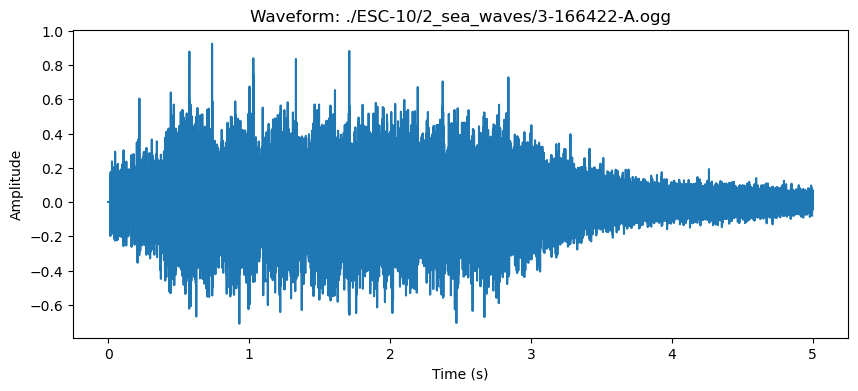

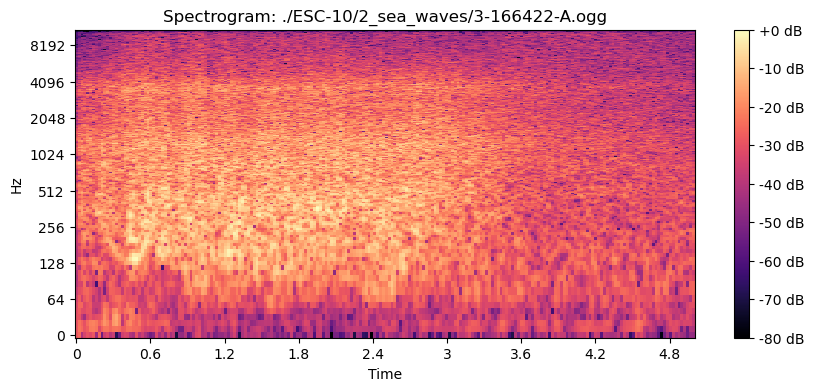

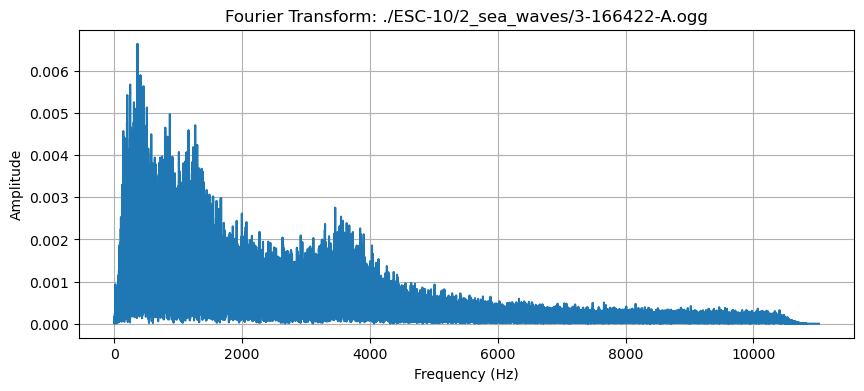

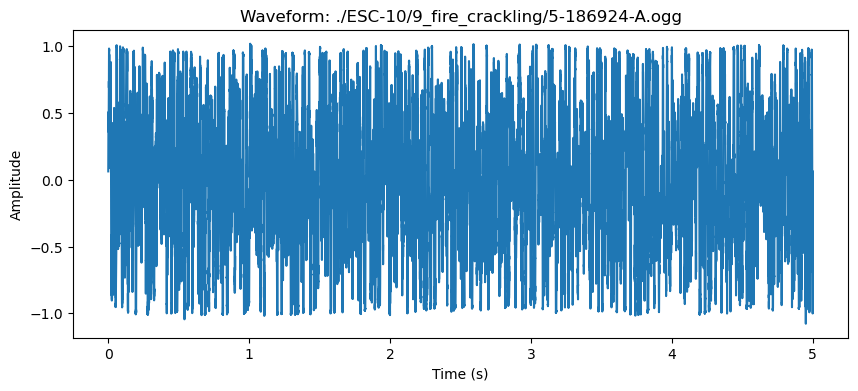

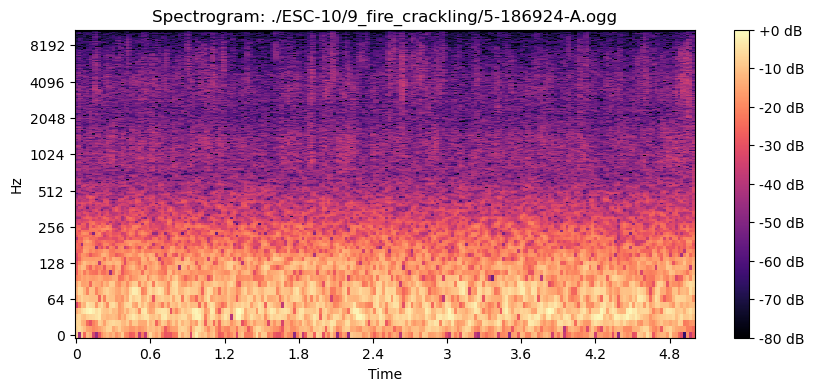

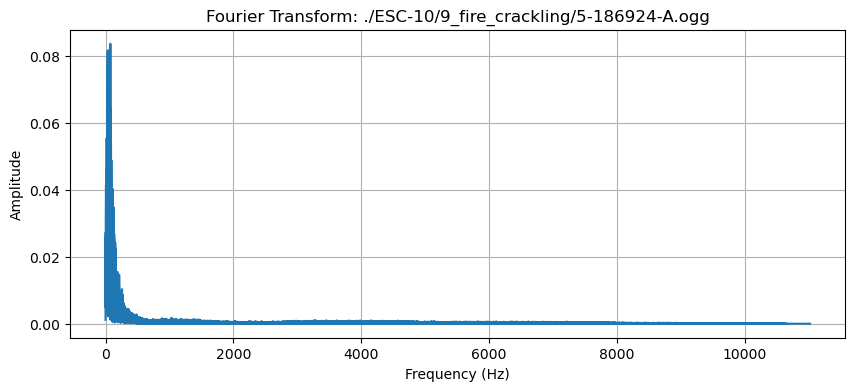

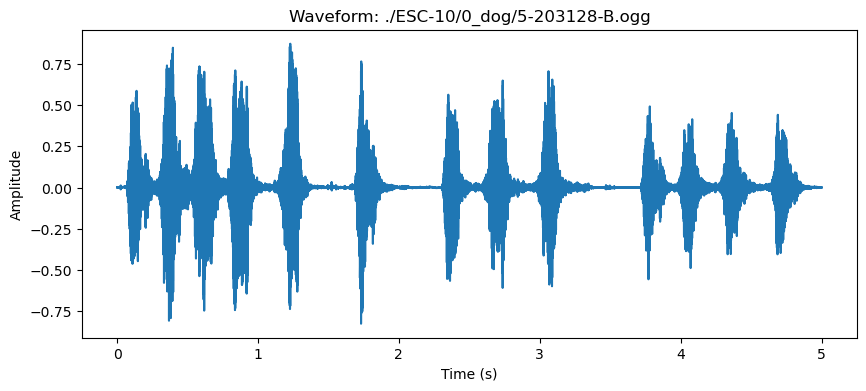

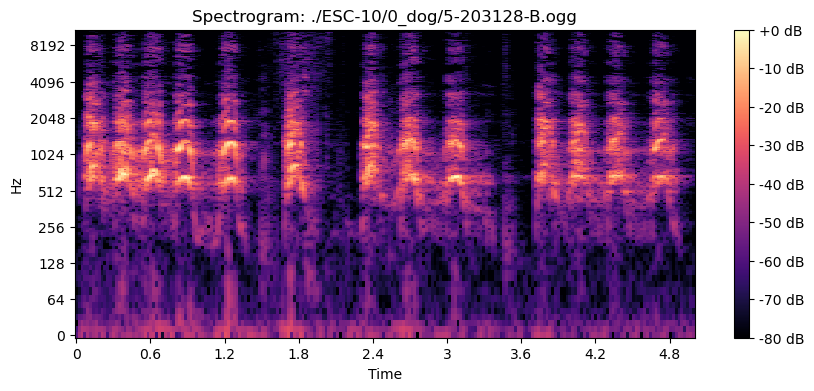

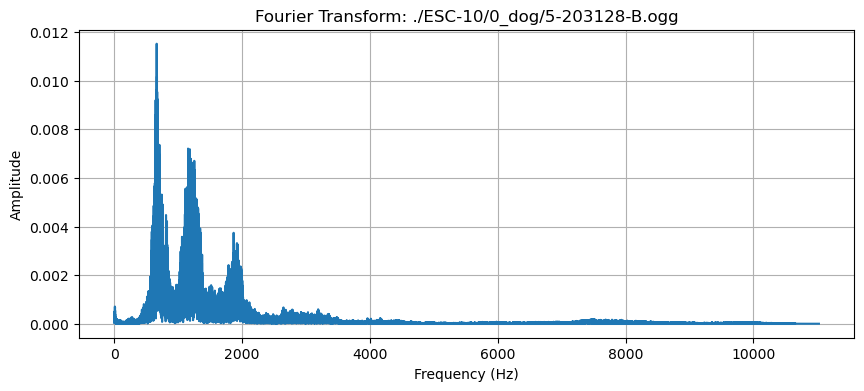

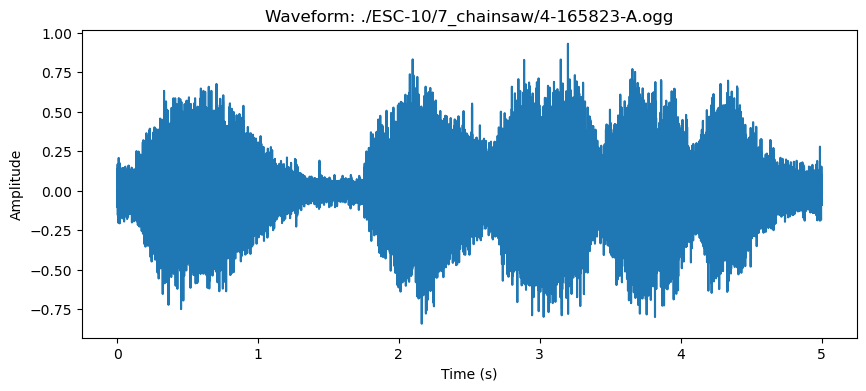

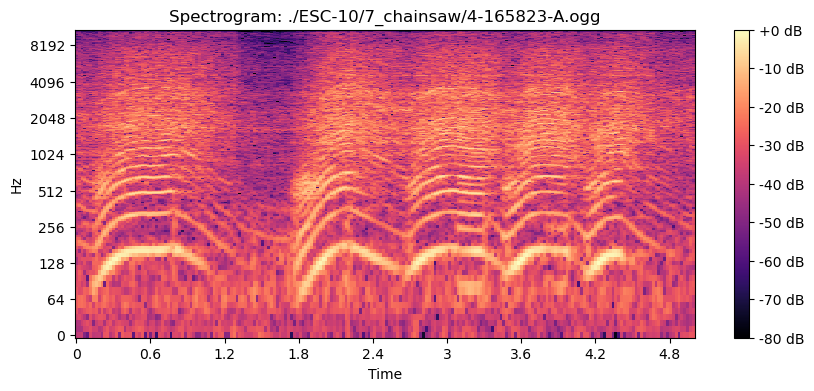

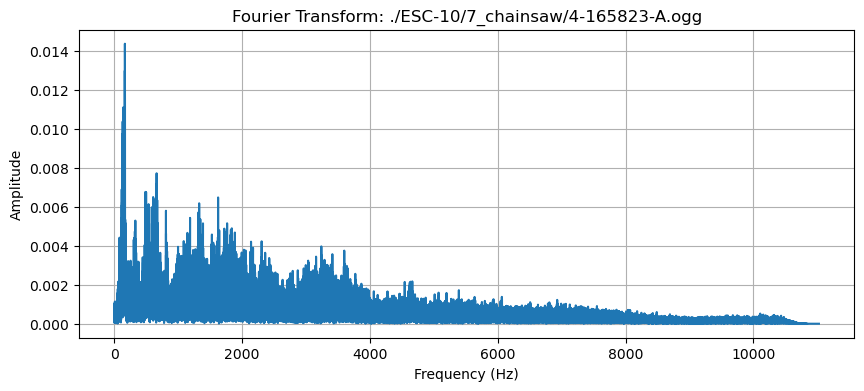

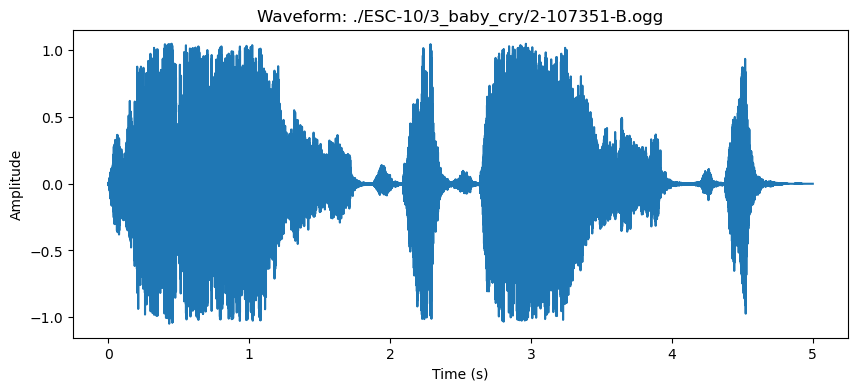

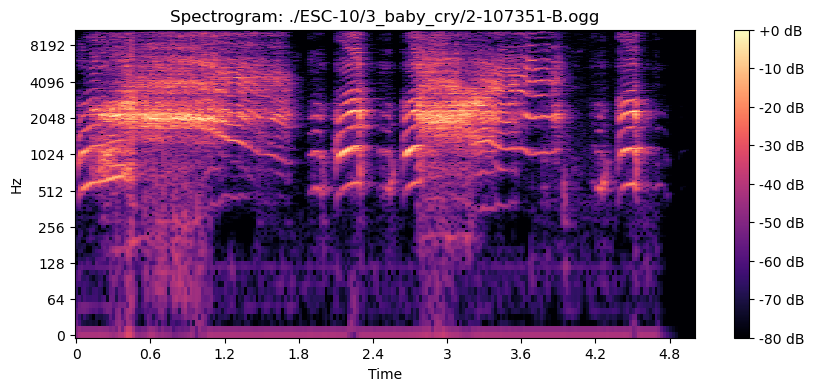

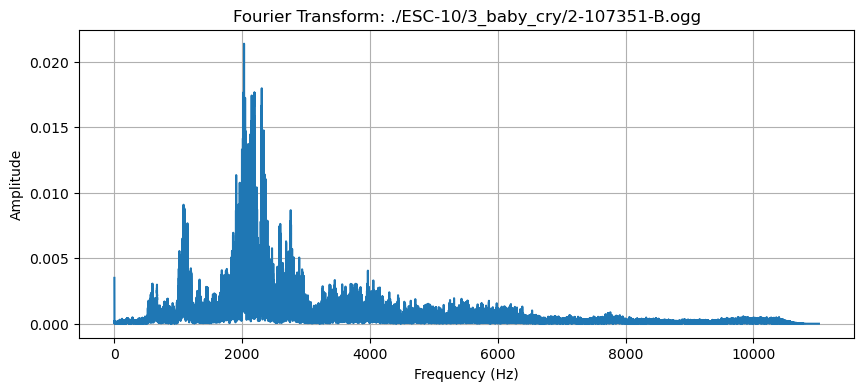

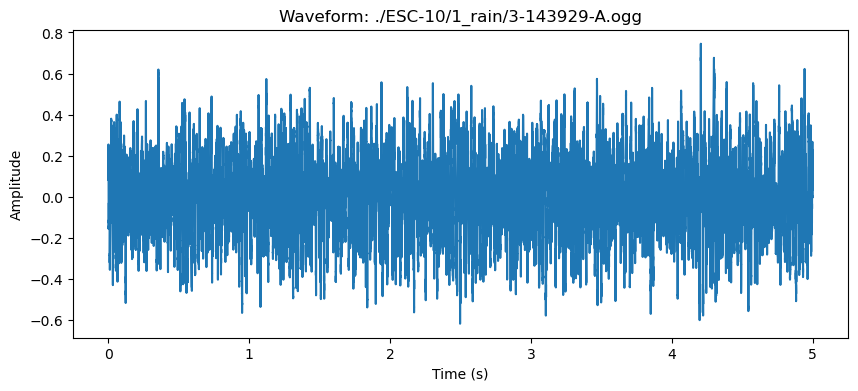

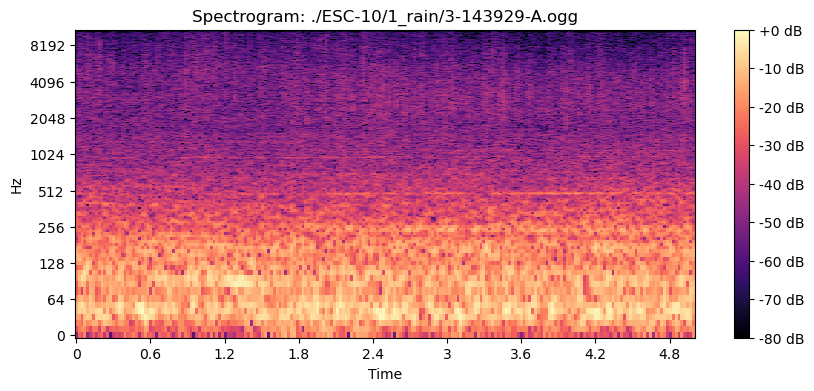

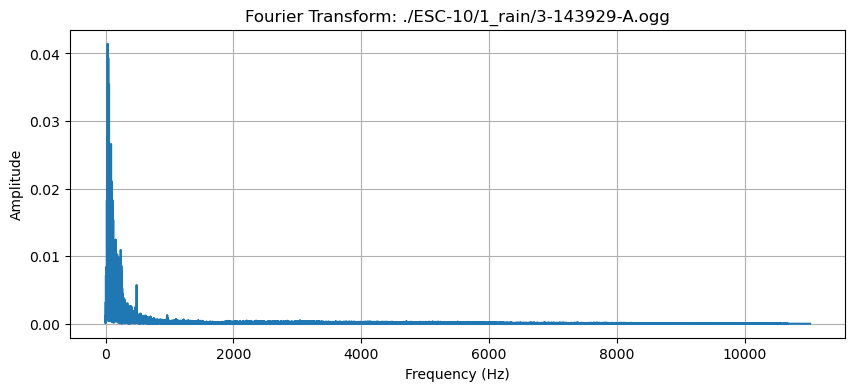

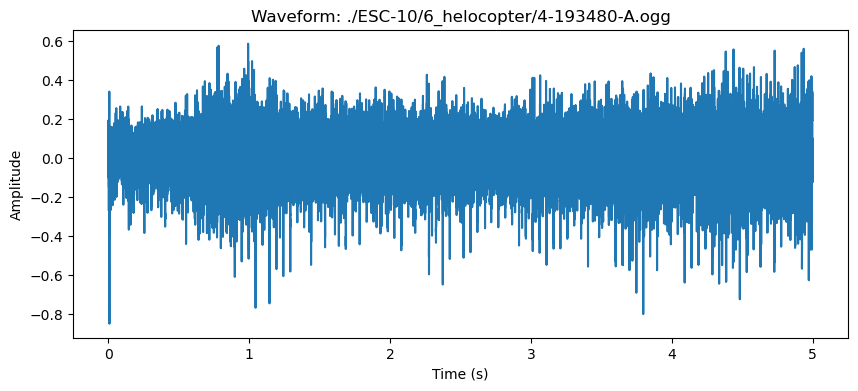

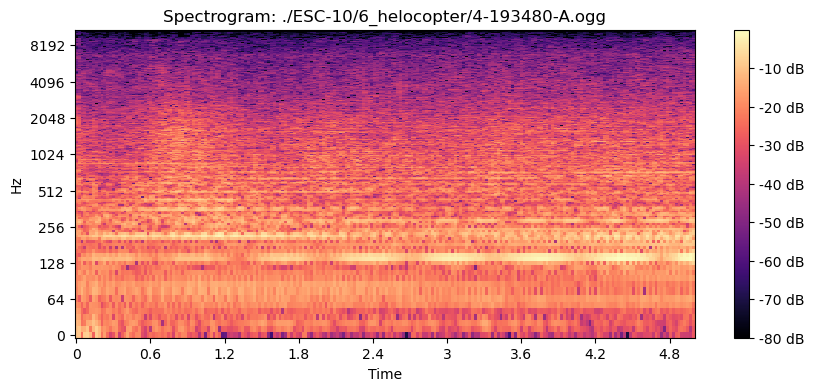

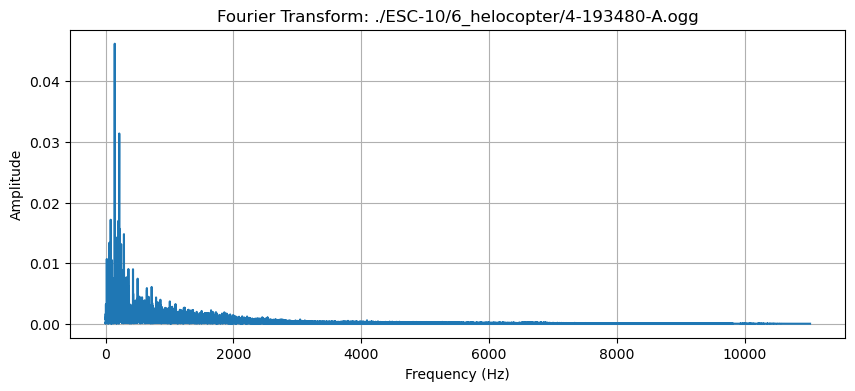

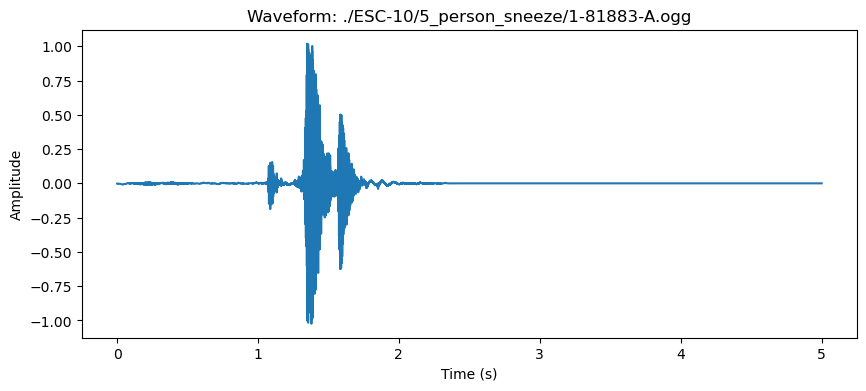

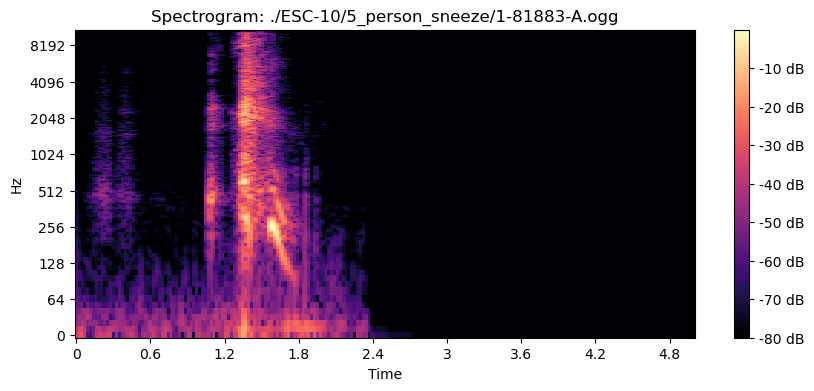

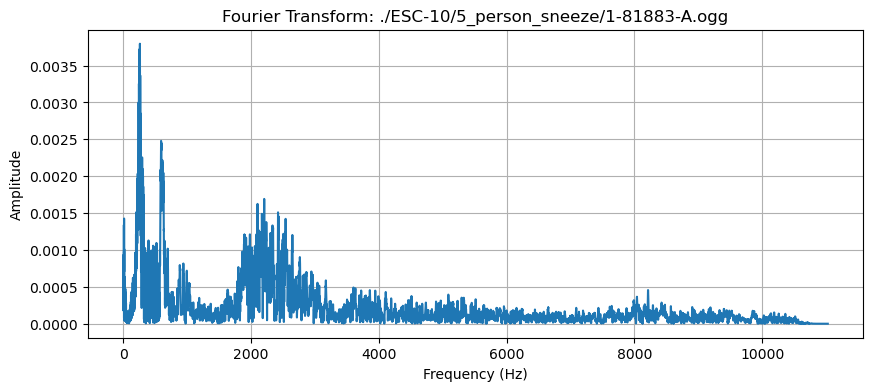

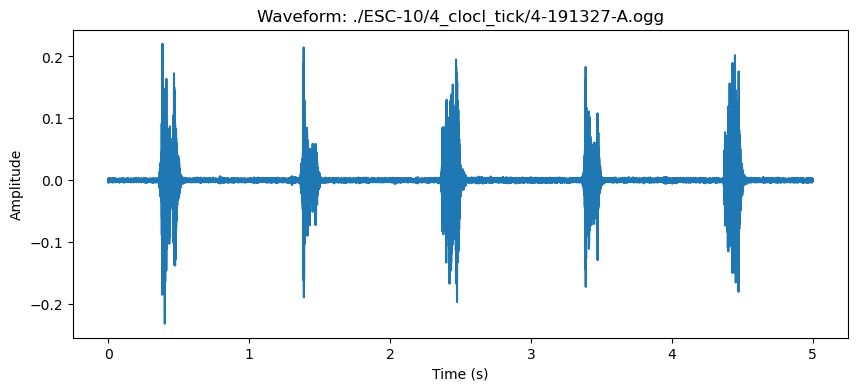

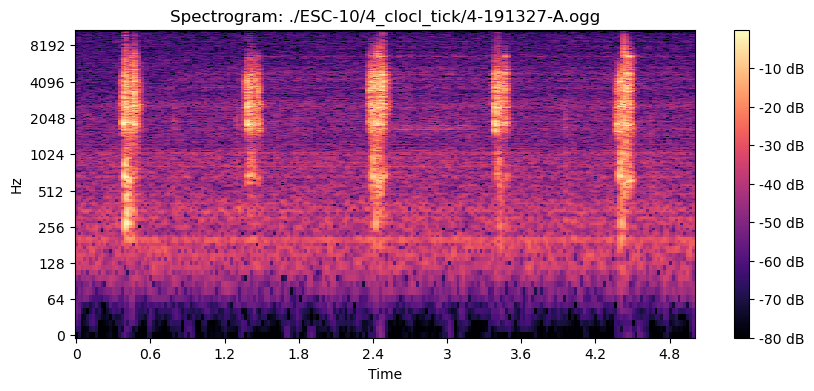

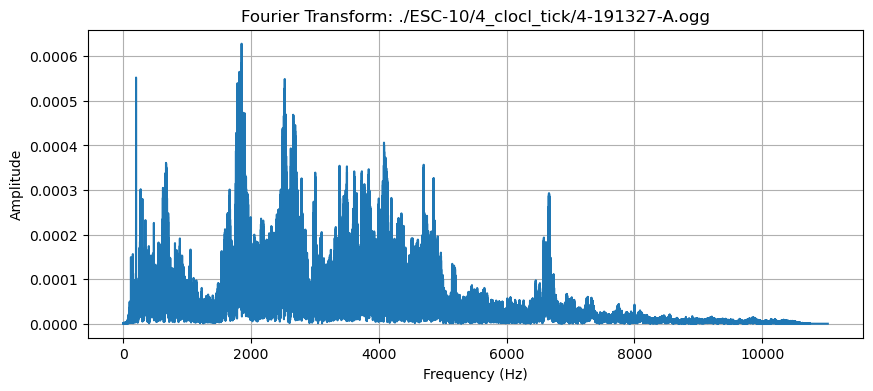

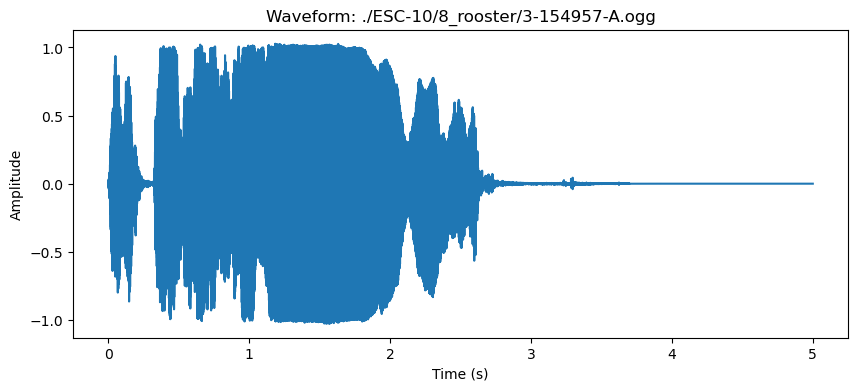

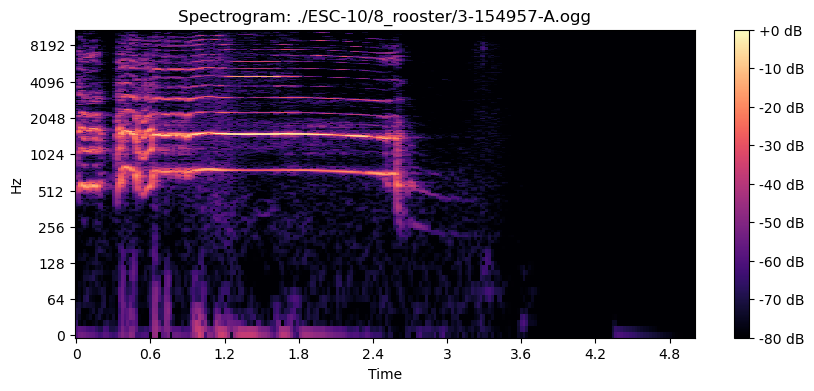

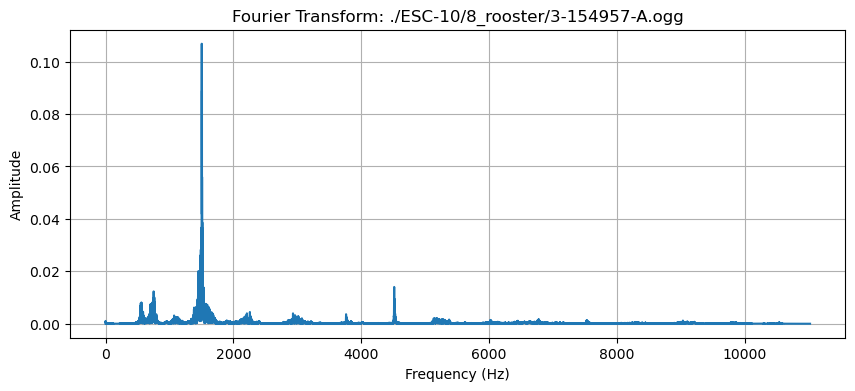

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to load and display waveform, spectrogram, and Fourier Transform
def analyze_audio(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Display waveform
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f"Waveform: {file_path}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

    # Display spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
    plt.title(f"Spectrogram: {file_path}")
    plt.colorbar(format="%+2.0f dB")
    plt.show()

    # Perform Fourier Transform
    n = len(y)
    T = 1.0 / sr
    yf = np.fft.fft(y)
    xf = np.fft.fftfreq(n, T)[:n//2]

    # Display Fourier Transform
    plt.figure(figsize=(10, 4))
    plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.title(f"Fourier Transform: {file_path}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

sound_files = os.listdir("./ESC-10")
for folder in sound_files: 
    f = os.listdir("./ESC-10/"+folder)
    analyze_audio("./ESC-10/"+folder+"/"+f[0])



# Week 3 and Week 4: 
## Feature Extraction for Machine learning model and machine learning model implementation 
- Extract features including Zero-Crossing Rate and Mel Frequency Cepstral Coefficients (MFCCs) from the audio signals. Zero-Crossing Rate and MFCCs are two important features used in audio signal processing and classification tasks, such as environmental sound classification.
- Machine Learning used in this CPD project: K-NN, Random Forest, and SVM. 

I also use the matlibplot visualize the features. 


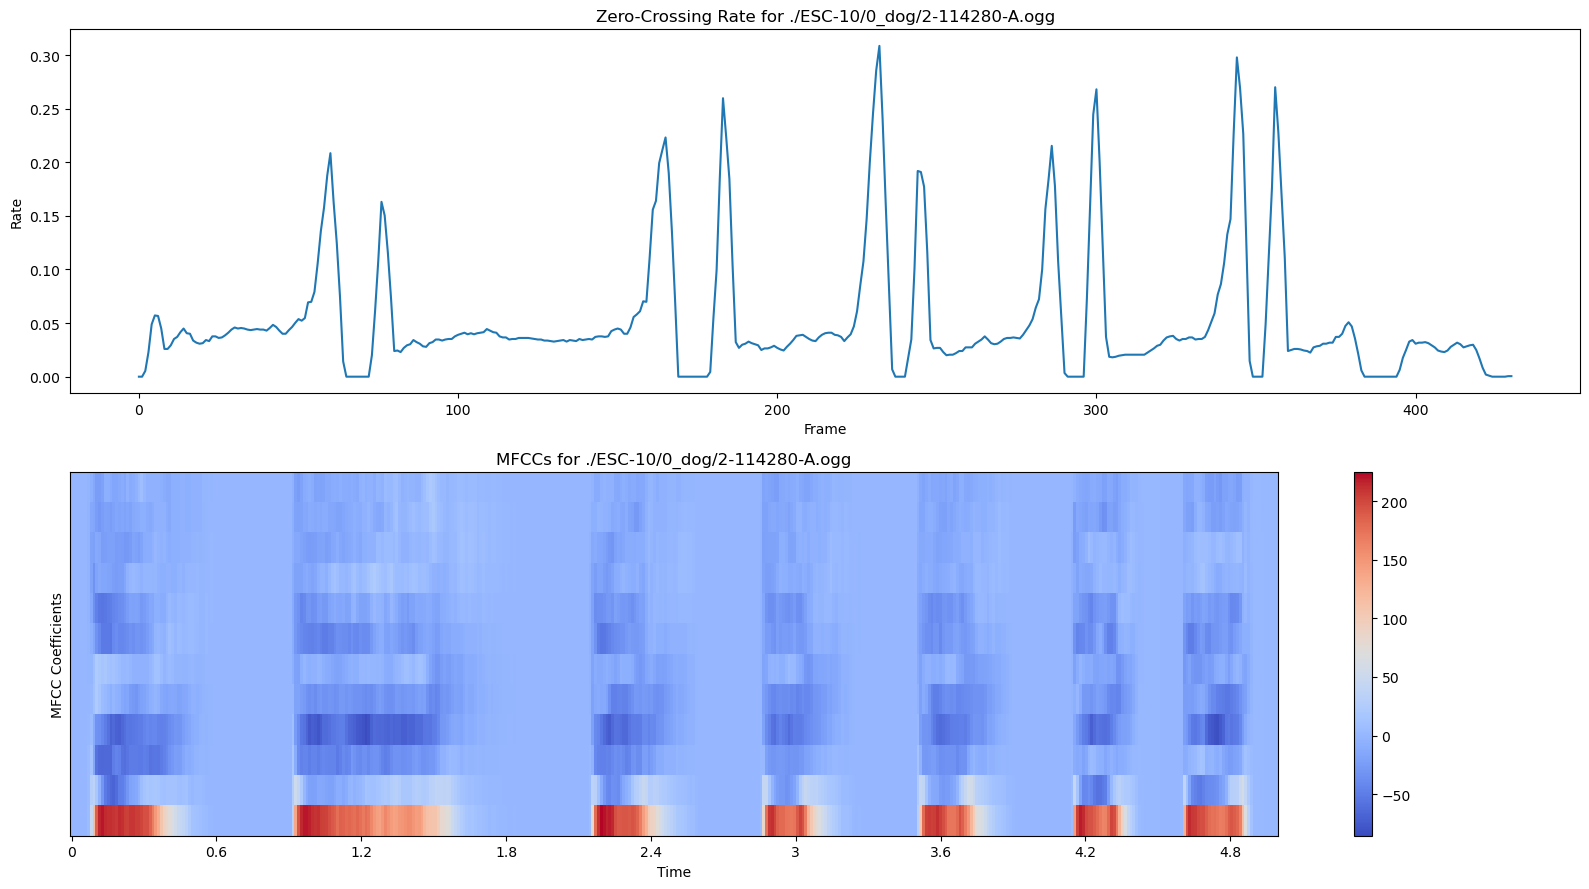

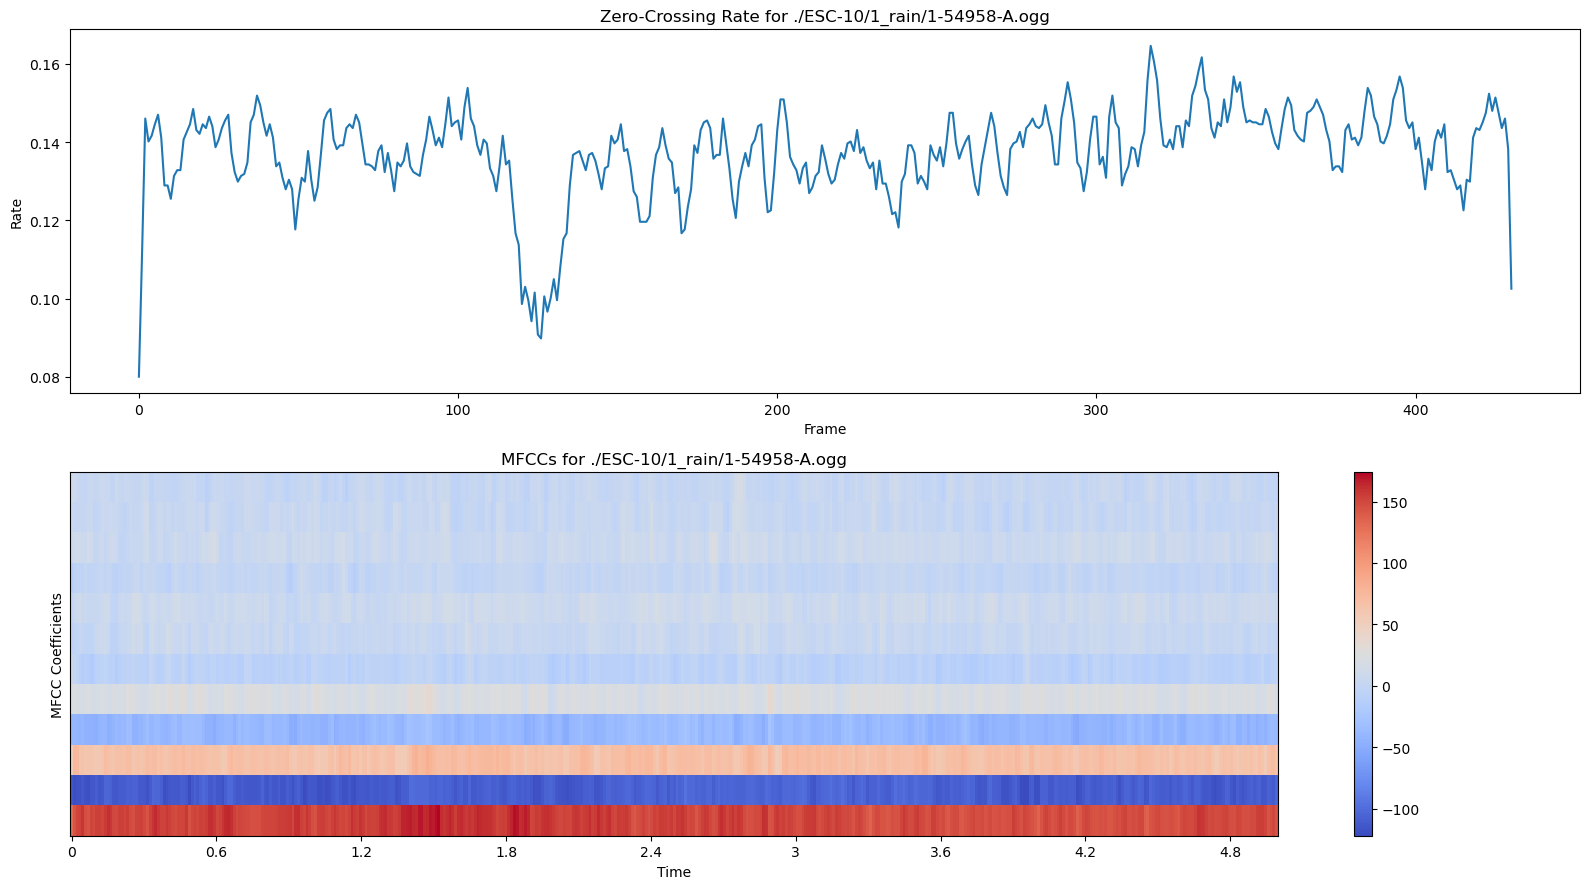

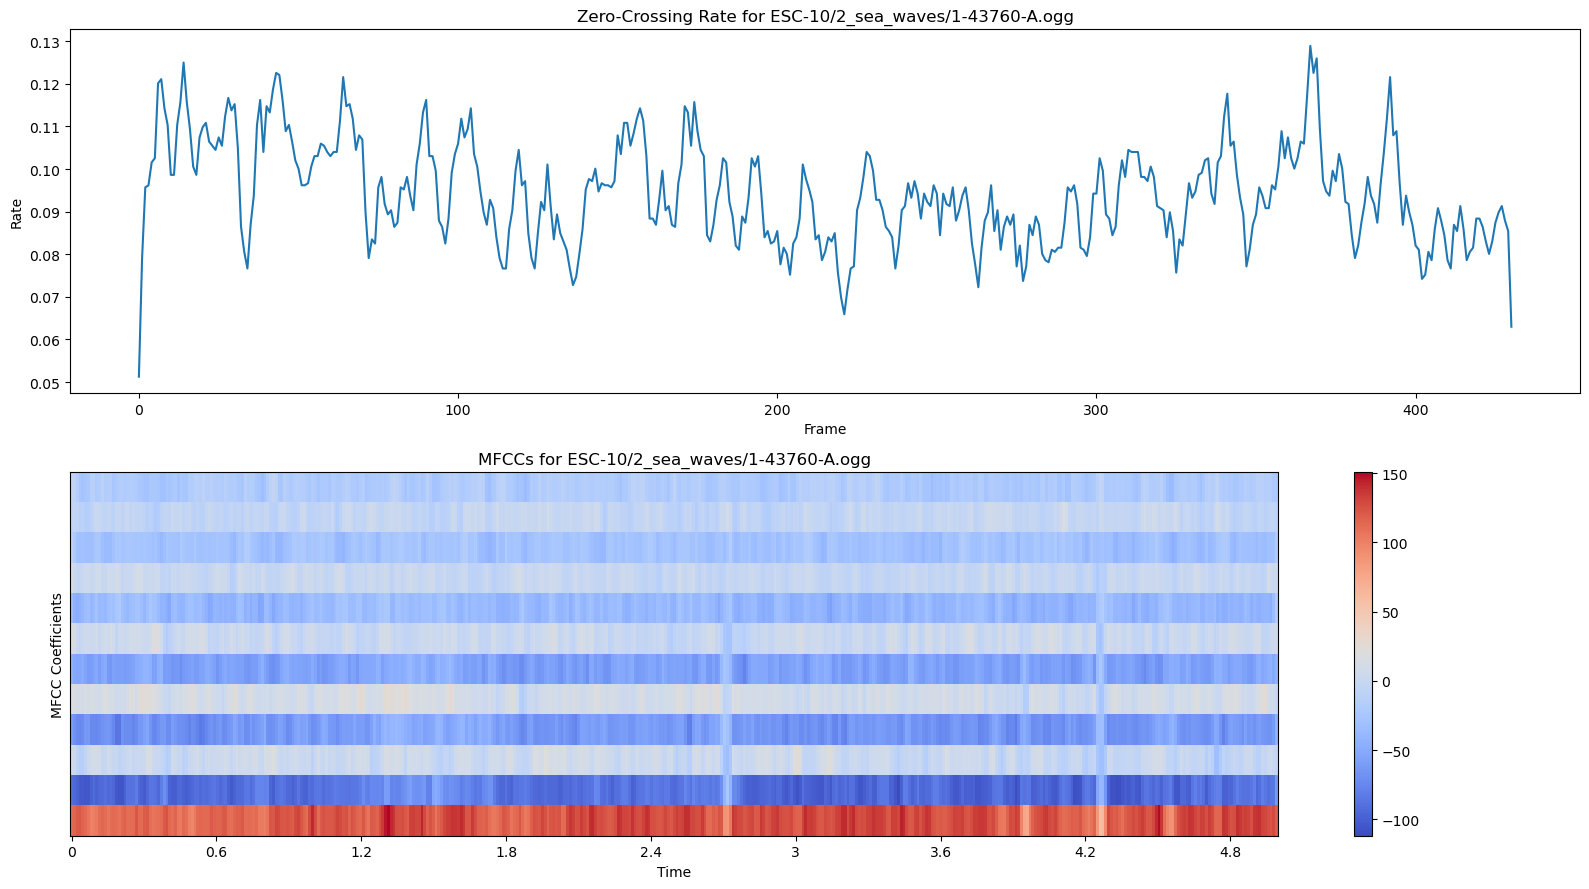

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


def extract_features(y, sr):
    # Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)[0]

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs = mfccs[1:13]  # Exclude the 0th coefficient
    
    return zcr, mfccs

def visualize_features(file_path):
    y, sr = librosa.load(file_path, sr=44100, mono=True)
    zcr, mfccs = extract_features(y, sr)
    
    plt.figure(figsize=(16, 9))
    
    plt.subplot(2, 1, 1)
    plt.plot(zcr)
    plt.title(f"Zero-Crossing Rate for {file_path}")
    plt.xlabel("Frame")
    plt.ylabel("Rate")

    # Plot MFCCs
    plt.subplot(2, 1, 2)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs for {file_path}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")

    plt.tight_layout()
    plt.show()


file_path = "./ESC-10/0_dog/2-114280-A.ogg"  
visualize_features(file_path) 
file_path = "./ESC-10/1_rain/1-54958-A.ogg"  
visualize_features(file_path)
file_path = "ESC-10/2_sea_waves/1-43760-A.ogg"  
visualize_features(file_path)

X: (400, 26)
y: (400,)
k-NN Accuracy: 0.66


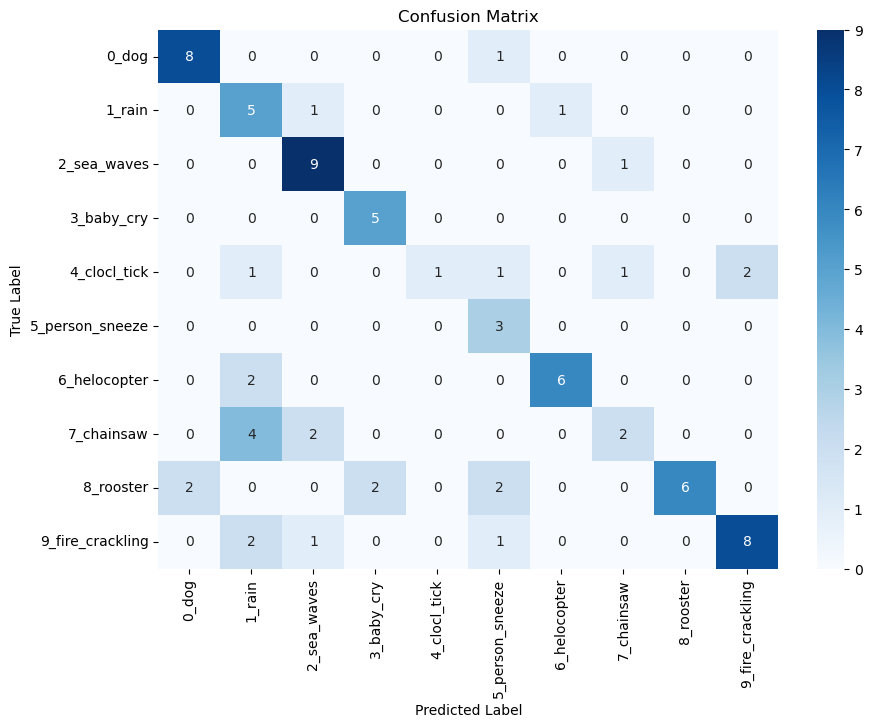

k-NN Cross-Validation Accuracy: 0.64 ± 0.05

Random Forest Accuracy: 0.76


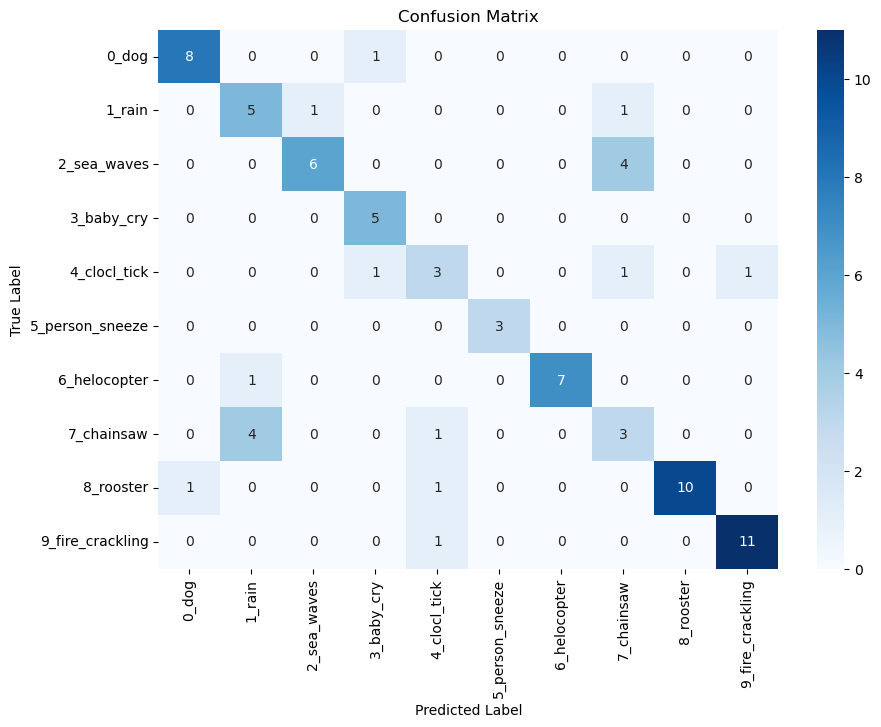

Random Forest Cross-Validation Accuracy: 0.76 ± 0.05

SVM Accuracy: 0.74


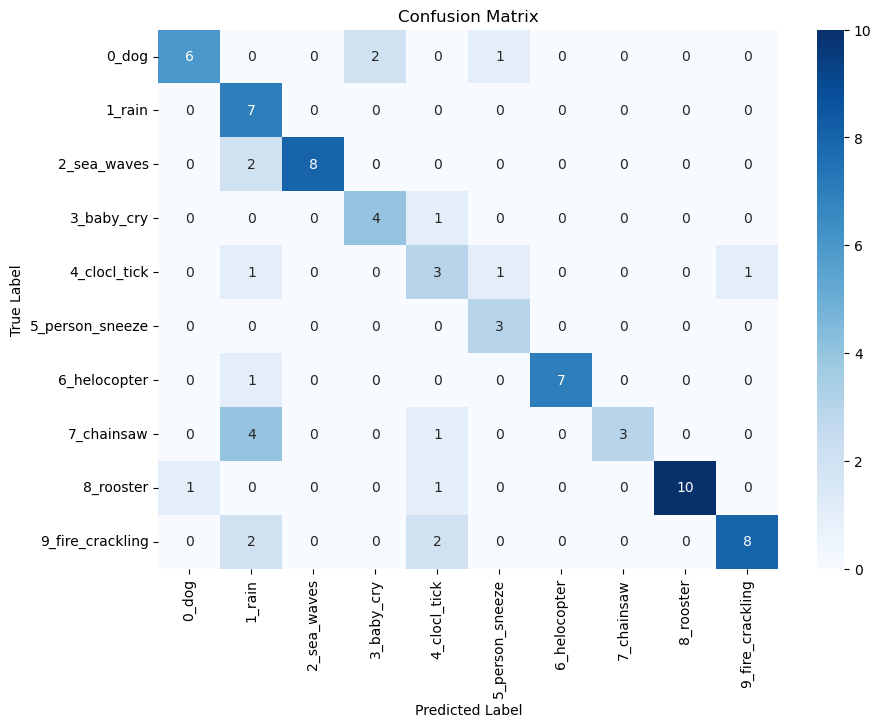

SVM Cross-Validation Accuracy: 0.68 ± 0.06



In [5]:
import os
import numpy as np
import librosa
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

def load_and_process_audio(file_path, sr=44100):
    y, sr = librosa.load(file_path, sr=sr, mono=True)
    return y, sr

def extract_features(y, sr):
    # Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)[0]

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs = mfccs[1:13]  # Exclude the 0th coefficient

    # Summary Statistics
    feature_vector = np.hstack([
        zcr.mean(), zcr.std(),
        mfccs.mean(axis=1), mfccs.std(axis=1)
    ])
    
    return feature_vector

def prepare_data(directory):
    X = []
    y = []
    for label in os.listdir(directory):
        class_dir = os.path.join(directory, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file)
                y_, sr = load_and_process_audio(file_path)
                features = extract_features(y_, sr)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()



# Load and process data
directory = "./ESC-10"
X, y = prepare_data(directory)
print("X:", np.shape(X)) 
print("y:", np.shape(y)) 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature vectors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classifiers
classifiers = {
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", random_state=42)
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    plot_confusion_matrix(cm, np.unique(y))

    # Cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}\n")

    # Save the model
    # joblib.dump(clf, f"{name}_model.joblib")
    # joblib.dump(scaler, f"{name}_scaler.joblib")

## detection Function for machine learning model 
- put correct model path and sound data path to run the program. 
- This program will return the predicted class. 

In [3]:
# Detection algorithm
def detect_sound(file_path, model_path, scaler_path):
    # Load the model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    
    # Process the new sound file
    y, sr = load_and_process_audio(file_path)
    features = extract_features(y, sr)
    features = features.reshape(1, -1)
    
    # Normalize the features
    features = scaler.transform(features)
    
    # Predict the class
    prediction = model.predict(features)
    return prediction


model_path = "Random Forest_model.joblib"
scaler_path = "Random Forest_scaler.joblib"
new_sound_file = "ESC-10/0_dog/1-30226-A.ogg"
predicted_class = detect_sound(new_sound_file, model_path, scaler_path)
print(f"Predicted class: {predicted_class}")

Predicted class: ['0_dog']


# Week 5 and Week 6: 
## Data processing and feature extraction for CNN model
1. Converts audio signals into log-scaled mel-spectrogram that is more suitable for machine learning models, capturing essential frequency information.
2. Splitting spectrograms into overlapping segments ensures more training samples and captures temporal variations within audio clips. Adding delta features enhances the model’s ability to detect changes in the spectrogram over time. 
3. Data augmentation increases the variability of the training data, helping the model generalize better by preventing overfitting. Techniques like time shifting, time stretching, and pitch shifting mimic natural variations in environmental sounds. 
4. Normalizing the data to have zero mean and unit variance ensures that the input features are on a similar scale, which speeds up convergence during training and improves model performance.

## CNN model design: 
- This CNN model is inspired by Karol J. Piczak’s work, is tailored for environmental sound classification.  
- This CNN model has 2 convolutional layer and 2 hidden layer for the fully connected layers. 

## Model Training: 
- Training the model involves iterating over the training data, computing the loss, and updating the model parameters using backpropagation. Monitoring the loss helps track the model’s learning progress. 


citation: https://www.karolpiczak.com/papers/Piczak2015-ESC-ConvNet.pdf 

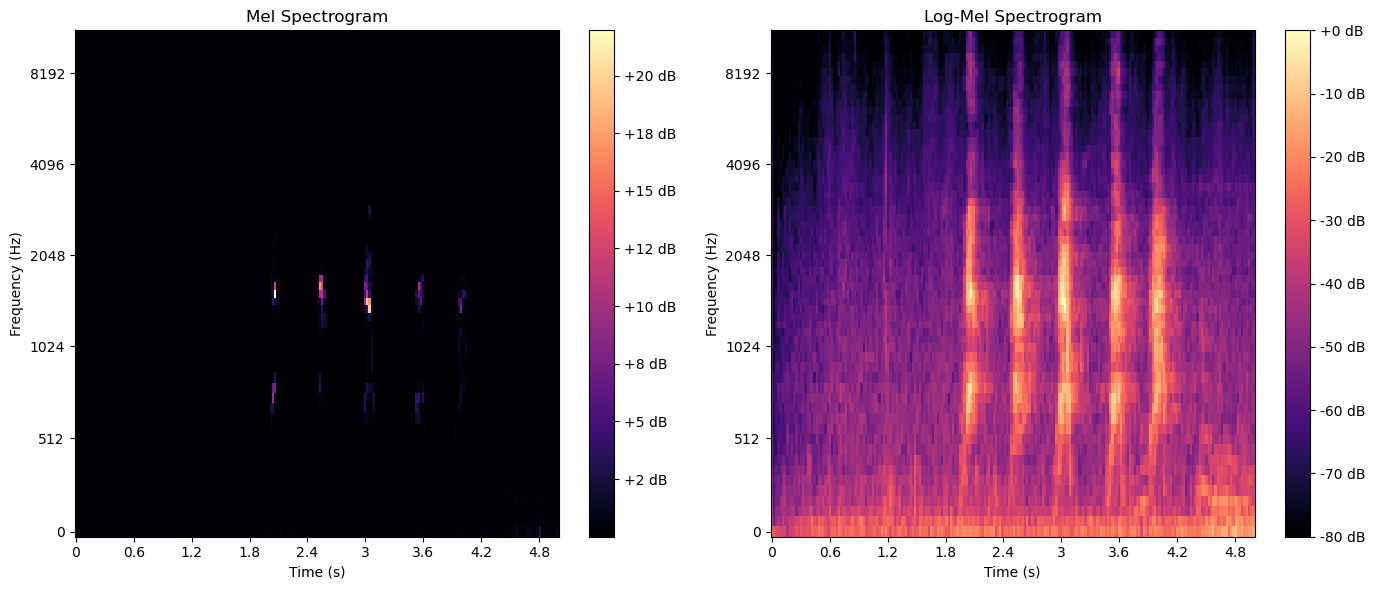

In [22]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Function to load an audio file and compute its mel and log-mel spectrograms
def plot_mel_and_log_mel_spectrograms(file_path, sr=22050, n_mels=60, n_fft=1024, hop_length=512):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=sr)
    
    # Compute the mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    
    # Convert the mel spectrogram to a log scale
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    # Plot the mel spectrogram
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    librosa.display.specshow(mel_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    
    # Plot the log-mel spectrogram
    plt.subplot(1, 2, 2)
    librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)') 
    
    plt.tight_layout()
    plt.show()

# Path of audio file
file_path = 'ESC-10/0_dog/1-30226-A.ogg'

# Plot the mel and log-mel spectrograms
plot_mel_and_log_mel_spectrograms(file_path)

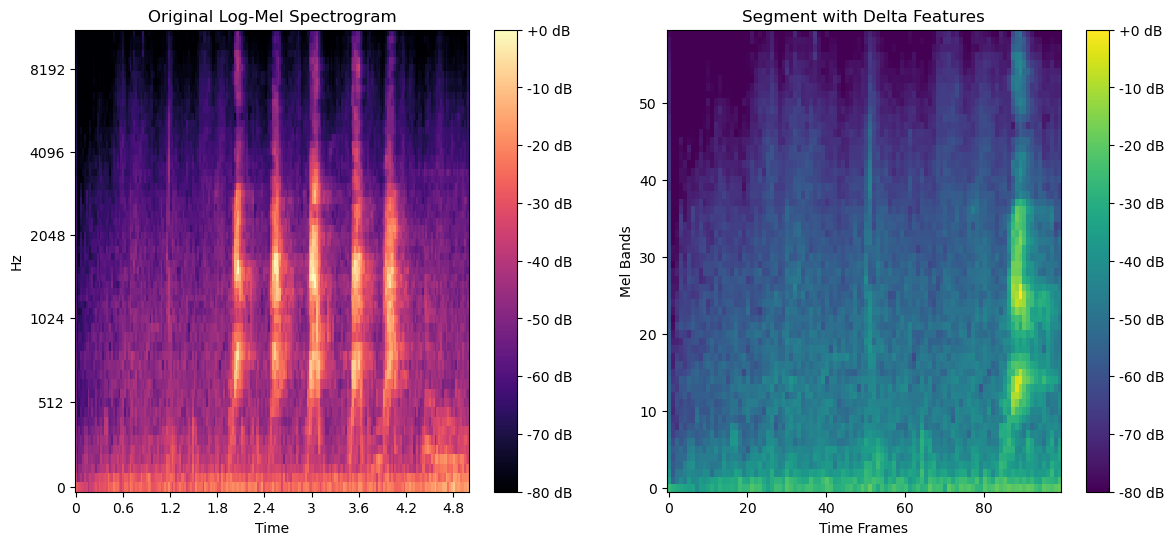

In [23]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Function to load an audio file and compute its log-mel spectrogram
def extract_log_mel_spectrogram(y, sr, n_mels=60, n_fft=1024, hop_length=512):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return log_mel_spectrogram

# Function to split the spectrogram into overlapping segments and add delta features
def split_spectrogram(spectrogram, segment_length, overlap):
    segments = []
    step = int(segment_length * (1 - overlap))
    for start in range(0, spectrogram.shape[1] - segment_length + 1, step):
        segment = spectrogram[:, start:start + segment_length]
        delta = librosa.feature.delta(segment)
        combined_segment = np.stack((segment, delta), axis=-1)
        segments.append(combined_segment)
    return np.array(segments)

# Function to visualize segments
def visualize_segments(spectrogram, segments, sr, hop_length):
    plt.figure(figsize=(14, 6))
    
    # Plot the original log-mel spectrogram
    plt.subplot(1, 2, 1)
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Original Log-Mel Spectrogram')
    
    # Plot the first segment with its delta features
    plt.subplot(1, 2, 2)
    combined_segment = segments[0]  # Take the first segment for visualization
    segment = combined_segment[:, :, 0]
    
    plt.imshow(segment, aspect='auto', origin='lower', cmap='viridis')
    plt.title('Segment with Delta Features')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time Frames')
    plt.ylabel('Mel Bands')

    plt.show()

# Load an audio file
file_path = 'ESC-10/0_dog/1-30226-A.ogg'
y, sr = librosa.load(file_path, sr=22050)

# Extract log-mel spectrogram
log_mel_spectrogram = extract_log_mel_spectrogram(y, sr)

# Split the spectrogram into overlapping segments and add delta features
segment_length = 100  # segment length
overlap = 0.5  # 50% overlap
segments = split_spectrogram(log_mel_spectrogram, segment_length, overlap)

# Visualize the original spectrogram and the first segment with delta features
visualize_segments(log_mel_spectrogram, segments, sr, hop_length=512)

In [ ]:
import os
import numpy as np
import librosa
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
SAMPLE_RATE = 22050

# Dataset class
class SoundDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx].transpose(2, 0, 1)  # from (height, width, channels) to (channels, height, width)
        return torch.tensor(sample, dtype=torch.float32), self.labels[idx]

def load_and_process_audio(file_path, sr=SAMPLE_RATE):
    y, sr = librosa.load(file_path, sr=sr, mono=True)
    return y, sr

def extract_log_mel_spectrogram(y, sr, n_mels=60, n_fft=1024, hop_length=512):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    return log_mel_spectrogram

def split_spectrogram(spectrogram, segment_length, overlap):
    segments = []
    step = int(segment_length * (1 - overlap))
    for start in range(0, spectrogram.shape[1] - segment_length + 1, step):
        segment = spectrogram[:, start : start + segment_length]
        delta = librosa.feature.delta(segment)
        combined_segment = np.stack((segment, delta), axis=-1)
        segments.append(combined_segment)
    return np.array(segments)

def augment_audio(y, sr, num_augmentations=10):
    augmented_ys = [y]
    for _ in range(num_augmentations):
        shift = np.random.randint(sr * 0.5)  # Shift up to half a second
        augmented_y = np.roll(y, shift)
        augmented_ys.append(augmented_y)
        stretch = np.random.uniform(0.8, 1.2)
        pitch_shift = np.random.randint(-2, 2)
        augmented_y = librosa.effects.time_stretch(y=y, rate=stretch)
        augmented_y = librosa.effects.pitch_shift(y=augmented_y, sr=sr, n_steps=pitch_shift)
        augmented_ys.append(augmented_y)
    return augmented_ys

def prepare_data(directory, sr=SAMPLE_RATE, n_mels=60, n_fft=1024, hop_length=512, short_segment=41, long_segment=101, short_overlap=0.5, long_overlap=0.9):
    X_short = []
    X_long = []
    y = []
    for label in os.listdir(directory):
        class_dir = os.path.join(directory, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file)
                y_, sr = load_and_process_audio(file_path, sr)
                augmentations = augment_audio(y_, sr)
                for aug_y in augmentations:
                    log_mel_spectrogram = extract_log_mel_spectrogram(aug_y, sr, n_mels, n_fft, hop_length)
                    short_segments = split_spectrogram(log_mel_spectrogram, short_segment, short_overlap)
                    long_segments = split_spectrogram(log_mel_spectrogram, long_segment, long_overlap)
                    X_short.extend(short_segments)
                    X_long.extend(long_segments)
                    y.extend([label] * len(short_segments))
    X_short = np.array(X_short)
    X_long = np.array(X_long)
    y = np.array(y)
    return X_short, X_long, y

def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X

# Define the CNN model
class PiczakCNN(nn.Module):
    def __init__(self):
        super(PiczakCNN, self).__init__()
        self.conv1 = nn.Conv2d(2, 80, kernel_size=(57, 6), stride=(1, 1))
        self.pool1 = nn.MaxPool2d(kernel_size=(4, 3), stride=(1, 3))
        self.conv2 = nn.Conv2d(80, 80, kernel_size=(1, 3), stride=(1, 1))
        self.pool2 = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))
        self.fc1 = nn.Linear(80 * 3 * 1, 5000)
        self.fc2 = nn.Linear(5000, 5000)
        self.fc3 = nn.Linear(5000, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")
    return model

def save_model(model, path="model.pth"):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return all_preds, all_labels

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def create_dataloaders(X, y, batch_size=1000, num_workers=2):
    dataset = SoundDataset(X, y)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    return loader

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data
directory = "./ESC-10"
X_short, X_long, y = prepare_data(directory)
X_short = normalize_data(X_short)
X_long = normalize_data(X_long)

# Convert labels to integers
label_to_int = {label: idx for idx, label in enumerate(np.unique(y))}
y = np.array([label_to_int[label] for label in y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_short, y, test_size=0.2, stratify=y)

# Create data loaders
train_loader = create_dataloaders(X_train, y_train)
test_loader = create_dataloaders(X_test, y_test)

# Initialize the model, criterion, and optimizer
model = PiczakCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.002, momentum=0.9, weight_decay=0.001, nesterov=True)

# Train the model
model = train_model(model, train_loader, criterion, optimizer, num_epochs=300)

# Save the trained model
save_model(model)

# Evaluate the model on the test set
preds, true_labels = evaluate_model(model, test_loader)
accuracy = accuracy_score(true_labels, preds)
cm = confusion_matrix(true_labels, preds)

# Print accuracies
print(f"Accuracy: {accuracy}")

# Plot confusion matrices
class_names = list(label_to_int.keys())
plot_confusion_matrix(cm, class_names)